$\textbf{Concept(s)-clé(s) et théorie}$

On considère un système d'équations linéaires aux inconnues $x_1,\ldots,x_n$
$$S=\left\{\begin{array}{ccccccc}
a_{11}x_1 &+a_{12}x_2 & + &\cdots &+a_{1n}x_n &= &b_1 \\
a_{21}x_1 &+a_{22}x_2 & + &\cdots &+a_{2n}x_n &= &b_2 \\
\vdots    &           &         &           &\vdots & \vdots &\vdots \\
a_{m1}x_1 &+a_{m2}x_2 & + &\cdots &+a_{mn}x_n &= &b_m
\end{array},\right. $$

où $a_{ij},b_i\in \mathbb{R}$ pour tout $1\leq i\leq m$ et tout $1\leq j\leq n.$ 

Un système d'équations linéaires à coefficients réels satisfait à précisément une des conditions suivantes.

1.Le système ne possède aucune solution.

2.Le système possède une solution unique.

3.Le système possède une infinité de solutions.


In [3]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)



In [4]:
import AL_Fct as al
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.magic import register_cell_magic
from IPython.display import HTML, display

@register_cell_magic
def bgc(color, cell=None):
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))

EXEMPLE :

Nous allons travailler avec un système de $2$ inconnues, $2$ équations:
$$
\begin{cases}
a_{11}x_1 + a_{12}x_2=b_1\\
a_{21}x_1 + a_{22}x_2=b_2.
\end{cases}
$$

Entrer un système de votre choix, vous verrez les graphes (ici des droites) et pourrez proposer une solution.


In [5]:
al.bgc('seashell')
#Par défaut, les coefficients sont fixés à 1 et n=2, m=2

n = 2
m = 2

MatriceCoeff = [ [1,-2,-1] , [-1,3,3] ]


<IPython.core.display.Latex object>

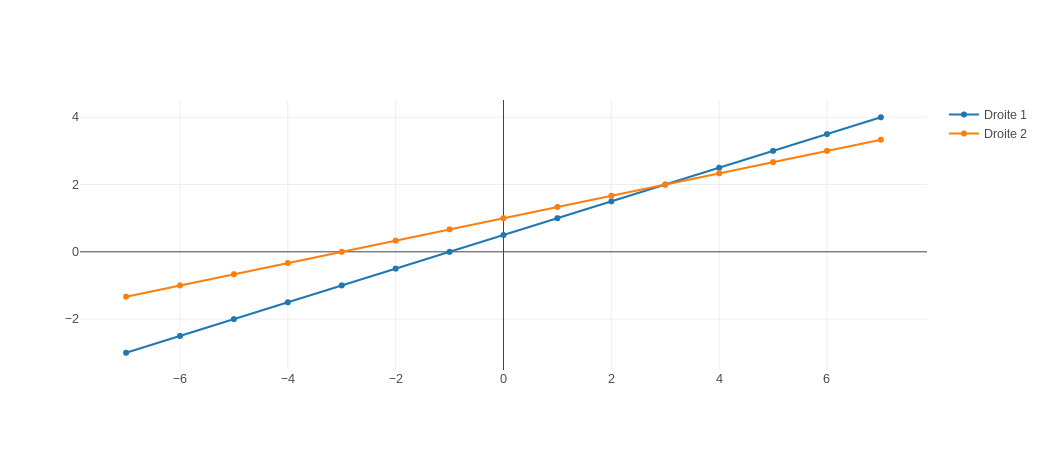

In [6]:
al.printSyst(m,n, MatriceCoeff)

al.Plot2DSys(-7,7,15,MatriceCoeff)


In [7]:
al.bgc('seashell')

solution=[3,2]
al.SolOfSyst(solution, MatriceCoeff,m)

La suite entrée est une solution de l'équation 1
La suite entrée est une solution de l'équation 2
C'est une solution du système


EXERCICE 1:
    
    

Pour chacun des cas ci-dessous, déterminer la/les solution(s) des systèmes. 

 $$ 
a)\begin{cases}
\dfrac{3}{2}x_1 - 2x_2&=0\\
-3x_1 + 5 x_2&=3
\end{cases} \hspace{1cm} b) \begin{cases}
x_1 - x_2&=\phantom{-}0\\
-3x_1 -  x_2&=-1\\
2x_1 + 3x_2&=-2
\end{cases}
$$


In [8]:
al.bgc('seashell')
#Par défaut, les coefficients sont fixés à 1 et n=2, m=2

n = 2
m = 3

MatriceCoeff = [ [1,-1,0] , [-3,-2,-5], [2,3,-5] ]


<IPython.core.display.Latex object>

La suite entrée n'est pas une solution de l'équation 1
La suite entrée n'est pas une solution de l'équation 2
La suite entrée n'est pas une solution de l'équation 3
Ce n'est pas une solution du système


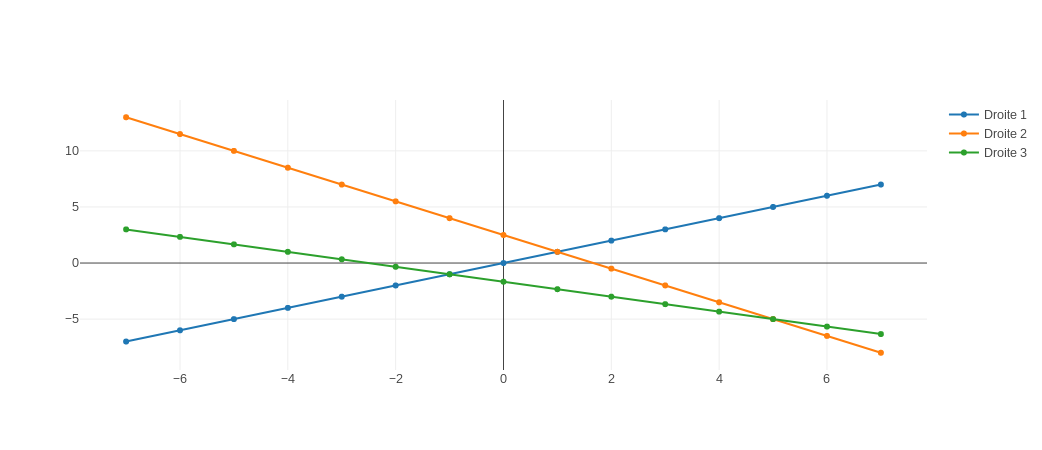

In [9]:
al.printSyst(m,n, MatriceCoeff)
solution=[4,3]
al.SolOfSyst(solution, MatriceCoeff,m)
al.Plot2DSys(-7,7,15,MatriceCoeff)

EXERCICE 2 WITH 3X3

In [16]:
al.bgc('seashell')
#Par défaut, les coefficients sont fixés à 1 et n=2, m=2

n = 3
m = 2

MatriceCoeff = [ [1,-1,2,0] , [-3,-2,1,-5] ]


In [42]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

import numpy as np
MatCoeff=np.array(MatriceCoeff)
xL=-10
xR=10
p=100
gr='rgb(102,255,102)'
org='rgb(255,117,26)'
red= 'rgb(255,0,0)'
blue='rgb(51, 214, 255)'
colors =[blue, gr, org]
s = np.linspace(xL, xR ,p)
t = np.linspace(xL, xR, p)
tGrid, sGrid = np.meshgrid(s, t)

x = sGrid
y = tGrid #always that
data=[]
for i in range(0, len(MatCoeff)):
    colorscale=[[0.0,colors[i]],
           [0.1, colors[i]],
           [0.2, colors[i]],
           [0.3, colors[i]],
           [0.4, colors[i]],
           [0.5, colors[i]],
           [0.6, colors[i]],
           [0.7, colors[i]],
           [0.8, colors[i]],
           [0.9, colors[i]],
           [1.0, colors[i]]]
    j=i+1
    surface = go.Surface(x=x, y=y, z=(MatCoeff[i,3]-MatCoeff[i,0]*x -MatCoeff[i,1]*y)/MatCoeff[i,2],
                         showscale=False, colorscale=colorscale, opacity=1, name='Plan %d' %j)
    data.append(surface)
    
layout = go.Layout(
    showlegend=True,
    legend=dict(orientation="h"),
    autosize=True,
    width=800,
    height=800, 
        scene=go.Scene(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
    zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)



EXERCICE 3 #code 1.2.Ex3

À l'aide des graphes interactifs ci-dessous, trouver les valeurs des paramètres $h$ et $k$ pour que les systèmes a), b), et c) admettent, si possible,
1. aucune solution
2. une unique solution
3. une infinité de solution 

$\color{red}{\rm{ Comment\, on\, corrige?}}$

$$ 
a)\begin{cases}
x_1 +5 x_2&=h\\
-2x_1 -10 x_2&=18
\end{cases} \hspace{1cm} b) \begin{cases}
hx_1 + x_2&=3\\
-2x_1 -  x_2&=-1
\end{cases}\hspace{1cm} c) \begin{cases}
3x_1 + hx_2&=1\\
x_1  + 3x_2&=h
\end{cases}\hspace{1cm} d) \begin{cases}
kx_1 + x_2&=h\\
3x_1  -5x_2&=2
\end{cases}
$$

In [10]:
import plotly
import plotly.plotly as py
import numpy as np
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from ipywidgets import interactive, HBox, VBox, widgets, interact


MatCoeff=[[1, 5, 3], [-2,-10,18]] # we initialize the problem. Not what we plot, the one plotted is at zero.
data=[]
x=np.linspace(-5,5,11)
MatCoeff=np.array(MatCoeff)
for i in range(1,len(MatCoeff)+1):
    trace=go.Scatter(x=x,  y= (MatCoeff[i-1,2]-MatCoeff[i-1,0]*x)/MatCoeff[i-1,1], name='a) Droite %d'%i)
    data.append(trace)
    
f=go.FigureWidget(data=data,
    layout=go.Layout(xaxis=dict(
        range=[-5, 5]
    ),
    yaxis=dict(
        range=[-10, 10]
    ) )
                  
)
#def update_y(coeff, cof):
  #  MatCoeff= [[coeff, 1, cof]]
  #  MatCoeff=np.array(MatCoeff)
  #  f.data[0].y=(MatCoeff[0,2]-MatCoeff[0,0]*x)/MatCoeff[0,1]
def update_y(h):
    MatCoeff= [[1, 5, h]]
    MatCoeff=np.array(MatCoeff)
    f.data[0].y=(MatCoeff[0,2]-MatCoeff[0,0]*x)/MatCoeff[0,1]
    
freq_slider = interactive(update_y, h=(-10, 10, 1/2)) #,cof=(-10, 10, 1))

vb = VBox((f, freq_slider))
vb.layout.align_items = 'center'
vb




    'data': [{'name': 'a) Droite 1',
              'type': 'scatter',
          …

In [11]:
MatCoeff=[[1, 1, 3], [-2,-1,-1]] # we initialize the problem. Not what we plot, the one plotted is at zero.
data=[]
x=np.linspace(-5,5,11)
MatCoeff=np.array(MatCoeff)
for i in range(1,len(MatCoeff)+1):
    trace=go.Scatter(x=x,  y= (MatCoeff[i-1,2]-MatCoeff[i-1,0]*x)/MatCoeff[i-1,1], name='b) Droite %d'%i)
    data.append(trace)
    
f=go.FigureWidget(data=data,
    layout=go.Layout(xaxis=dict(
        range=[-5, 5]
    ),
    yaxis=dict(
        range=[-10, 10]
    ) )
                  
)
#def update_y(coeff, cof):
  #  MatCoeff= [[coeff, 1, cof]]
  #  MatCoeff=np.array(MatCoeff)
  #  f.data[0].y=(MatCoeff[0,2]-MatCoeff[0,0]*x)/MatCoeff[0,1]
def update_y(h):
    MatCoeff= [[h, 1, 3]]
    MatCoeff=np.array(MatCoeff)
    f.data[0].y=(MatCoeff[0,2]-MatCoeff[0,0]*x)/MatCoeff[0,1]
    
freq_slider = interactive(update_y, h=(-10, 10, 1/2)) #,cof=(-10, 10, 1))

vb = VBox((f, freq_slider))
vb.layout.align_items = 'center'
vb

    'data': [{'name': 'b) Droite 1',
              'type': 'scatter',
          …

In [12]:
MatCoeff=[[3, 1, 1], [1,3,1]] # we initialize the problem. Not what we plot, the one plotted is at zero.
data=[]
x=np.linspace(-25,25,101)
MatCoeff=np.array(MatCoeff)
for i in range(1,len(MatCoeff)+1):
    trace=go.Scatter(x=x,  y= (MatCoeff[i-1,2]-MatCoeff[i-1,0]*x)/MatCoeff[i-1,1], name='c) Droite %d'%i)
    data.append(trace)
    
f=go.FigureWidget(data=data,
    layout=go.Layout(xaxis=dict(
        range=[-25, 25]
    ),
    yaxis=dict(
        range=[-50, 50]
    ) )
                  
)
#def update_y(coeff, cof):
  #  MatCoeff= [[coeff, 1, cof]]
  #  MatCoeff=np.array(MatCoeff)
  #  f.data[0].y=(MatCoeff[0,2]-MatCoeff[0,0]*x)/MatCoeff[0,1]
def update_y(h):
    MatCoeff= [[h, 3, 1],[3, 1, h] ]
    MatCoeff=np.array(MatCoeff)
    f.data[0].y=(MatCoeff[0,2]-MatCoeff[0,0]*x)/MatCoeff[0,1]
    f.data[1].y=(MatCoeff[1,2]-MatCoeff[1,0]*x)/MatCoeff[1,1]

freq_slider = interactive(update_y, h=(-20, 20, 1)) #,cof=(-10, 10, 1))

vb = VBox((f, freq_slider))
vb.layout.align_items = 'center'
vb

    'data': [{'name': 'c) Droite 1',
              'type': 'scatter',
          …

In [13]:
MatCoeff=[[3, 1, 1], [1,3,1]] # we initialize the problem. Not what we plot, the one plotted is at zero.
data=[]
x=np.linspace(-15,15,101)
MatCoeff=np.array(MatCoeff)
for i in range(1,len(MatCoeff)+1):
    trace=go.Scatter(x=x,  y= (MatCoeff[i-1,2]-MatCoeff[i-1,0]*x)/MatCoeff[i-1,1], name='d) Droite %d'%i)
    data.append(trace)
    
f=go.FigureWidget(data=data,
    layout=go.Layout(xaxis=dict(
        range=[-15, 15]
    ),
    yaxis=dict(
        range=[-10, 10]
    ) )
                  
)
#def update_y(coeff, cof):
  #  MatCoeff= [[coeff, 1, cof]]
  #  MatCoeff=np.array(MatCoeff)
  #  f.data[0].y=(MatCoeff[0,2]-MatCoeff[0,0]*x)/MatCoeff[0,1]
def update_y(h, k):
    MatCoeff= [[h, 1, k],[2, -5, 5] ]
    MatCoeff=np.array(MatCoeff)
    f.data[0].y=(MatCoeff[0,2]-MatCoeff[0,0]*x)/MatCoeff[0,1]
    f.data[1].y=(MatCoeff[1,2]-MatCoeff[1,0]*x)/MatCoeff[1,1]

freq_slider = interactive(update_y, h=(-10, 10, 1/10),k=(-10, 10, 1))

vb = VBox((f, freq_slider))
vb.layout.align_items = 'center'
vb

    'data': [{'name': 'd) Droite 1',
              'type': 'scatter',
          …